<a href="https://colab.research.google.com/github/missZina/Detection-of-Lung-Infection-that-help-to-predict-COVID-19/blob/master/chestPreparationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


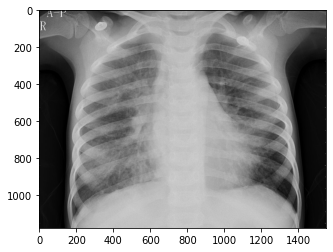

Found 501 images belonging to 3 classes.
{'Bacteria': 0, 'Healthy': 1, 'Infected_virus': 2}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.68 max: 149.1116


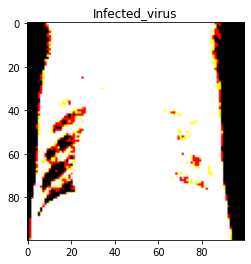

In [1]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

num_of_test_samples = 450
# re-size all the images to this
IMAGE_SIZE = [100, 100] 

# training config:
epochs = 20
batch_size = 32
train_path = '../content/drive/My Drive/chestdataset/train'
valid_path = '../content/drive/My Drive/chestdataset/valid'


image_files = glob(train_path + '/*/*.jpe*g')
valid_image_files = glob(valid_path + '/*/*.jpe*g')
folders = glob(train_path + '/*')


plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()


#  ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)


# testing generator

test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break